In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
p1 = '/content/drive/MyDrive/Colab Notebooks/MVT/Mobile.csv'
df = pd.read_csv(p1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [ ]:
df.describe()

,Battery Capacity (mAh)
count,407.000000
mean,4676.476658
std,797.193713
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [ ]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [ ]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

##Data Preparation
Data preparation follows a series of steps that starts with collecting the right data, followed by cleaning, labeling, and then validation and visualization.

In [ ]:
np.array(df["Screen Size (inches)"])

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.1', '6.7', '6.67', '6.55',
       '6.78', '6.43', '6.5', '6.62', '5.4', '6.7', '6.55', '6.2', '6.51',
       '6.5', '6.43', '6.5', '6.6', '6.5', '6.55', '6.67', '6.1', '6.5',
       '6.5', '6.51', '6.5', '6.7', '6.5', '4.7', '6.5', '6.58', '6.5',
       '6.4', '6.43', '6.5', '6.1', '6.52', '6.5', '6.4', '6.43', '6.67',
       '5.4', '6.44', '6.5', '6.5', '6.52', '6.53', '6.5', '6.51', '6.5',
       '6.5', '6.51', '6.53', '6.7', '6.58', '6.7', '6.55', '6.5', '4.7',
       '6.58', '6.5', '6.5', '6.43', '6.43', '6.1', '6.51', '6.5', '6.6',
       '6.43', '6.55', '6.1', '6.56', '6.5', '6.1', '6.2', '6.43', '6.4',
       '6.67', '6.43', '6.78', '6.55', '6.7', '6.67', '6.1', '6.8 + 3.9',
       '6.67', '4.5', '6.7', '6.67', '6.5', '6.43', '6.58', '6.8', '6.39',
       '6.7', '5.9', '4.5', '5.5', '6.7', '6.7', '6.81', '6.52', '6.51',
       '6.5', '6.5', '6.5', '6.5', '6.5', '6.78', '6.8', '5.99', '6.55',
       '6.5', '6.5', '6.5', '6.5', '6.5', 

In [ ]:
df["Price ($)"]=df["Price ($)"].str.extract('(\d+)', expand=False)


In [ ]:
df["Price ($)"]

0       999
1      1199
2       899
3       279
4       799
       ... 
402    1049
403     349
404    1099
405     429
406     649
Name: Price ($), Length: 407, dtype: object

In [ ]:
df["Price ($)"]=df["Price ($)"].astype(int)

In [ ]:
df["RAM "]=df["RAM "].str.replace("GB","")
df["RAM "]=df["RAM "].astype(int)

In [ ]:
df["Storage "]=df["Storage "].str.replace("GB","")
df["Storage "]=df["Storage "].astype(int)

In [ ]:
df['n_cameras'] = df['Camera (MP)'].str.count('\\+') + 1

In [ ]:
res1 = []
res2 = []
res3 = []
res4 = []
for x in df['Camera (MP)']:
    resolutions = x.split('+')
    tam = len(resolutions)

    if tam == 1:
        res1.append(resolutions[0])
        res2.append('0')
        res3.append('0')
        res4.append('0')

    if tam == 2:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append('0')
        res4.append('0')

    if tam == 3:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append('0')

    if tam == 4:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append(resolutions[3])

df['res1'] = res1
df['res2'] = res2
df['res3'] = res3
df['res4'] = res4

df= df.drop(columns='Camera (MP)')
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4
0,Apple,iPhone 13 Pro,128,6,6.1,3095,999,3,12,12,12,0
1,Samsung,Galaxy S21 Ultra,256,12,6.8,5000,1199,4,108,10,10,12
2,OnePlus,9 Pro,128,8,6.7,4500,899,4,48,50,8,2
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,5020,279,4,64,8,5,2
4,Google,Pixel 6,128,8,6.4,4614,799,2,50,12.2,0,0


In [ ]:
df['Screen Size (inches)'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')

In [ ]:
cem1 = []
cem2 = []
cem3 = []
for x in df['Screen Size (inches)']:
    resolutions = x.split('.')
    tam = len(resolutions)

    if tam == 1:
        cem1.append(resolutions[0])
        cem2.append('0')
        cem3.append('0')

    if tam == 2:
        cem1.append(resolutions[0])
        cem2.append(resolutions[1])
        cem3.append('0')

    if tam == 3:
        cem1.append(resolutions[0])
        cem2.append(resolutions[1])
        cem3.append(resolutions[2])


df['cem1'] = cem1
df['cem2'] = cem2
df['cem3'] = cem3

df= df.drop(columns='Screen Size (inches)')

In [ ]:
df["screen"] = df['cem1']+"."+ df["cem2"]
df=df.drop(["cem1","cem2","cem3"],axis=1)
df

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
0,Apple,iPhone 13 Pro,128,6,3095,999,3,12,12,12,0,6.1
1,Samsung,Galaxy S21 Ultra,256,12,5000,1199,4,108,10,10,12,6.8
2,OnePlus,9 Pro,128,8,4500,899,4,48,50,8,2,6.7
3,Xiaomi,Redmi Note 10 Pro,128,6,5020,279,4,64,8,5,2,6.67
4,Google,Pixel 6,128,8,4614,799,2,50,12.2,0,0,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,4300,1049,3,12,64,12,0,6.7
403,Xiaomi,Mi 10 Lite 5G,128,6,4160,349,4,48,8,2,2,6.57
404,Apple,iPhone 12 Pro Max,128,6,3687,1099,3,12,12,12,0,6.7
405,Oppo,Reno3,128,8,4025,429,4,48,13,8,2,6.4


In [ ]:
df["screen"]=df["screen"].astype(float)

In [ ]:
df["res1"]=df["res1"].str.extract('(\d+)', expand=False)

In [ ]:
df["res1"]=df["res1"].astype(int)

In [ ]:
df["res2"]=df["res2"].str.extract('(\d+)', expand=False)

In [ ]:
df["res2"]=df["res2"].astype(int)

In [ ]:
df["res3"]=df["res3"].str.extract('(\d+)', expand=False)

In [ ]:
df["res3"]=df["res3"].astype(int)

In [ ]:
np.array(df["res4"])

array(['0', ' 12', ' 2', ' 2', '0', '0', '0', ' 2', ' 2', ' 8', '0', ' 5',
       '0', '0', ' 3', '0', '0', '0', '0', ' 2', ' 2', '0', '0', '0',
       ' 2', '0', '0', '0', '0', '0', ' 5', ' 2', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', ' 2', ' 2', '0', '0', '0', '0', ' 2', '0',
       ' 2', '0', '0', '0', ' 5', '0', ' 2', '0', '0', ' 5', ' 2', '0',
       '0', '0', ' 2', ' 5', ' 2', ' 2', '0', '0', '0', '0', ' 2', '0',
       '0', '0', '0', '0', '0', '0', '0', ' 2MP', '0', ' 8MP', ' 2MP',
       '0', '0', '0', '0', '0', '0', ' 5MP', ' 2MP', '0', ' 2MP', '0',
       '0', '0', ' 2MP', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', ' 2MP', '0', ' 2MP', '0', '0', '0',
       ' 2MP', '0', '0', '0', ' 2MP', '0', '0', '0', ' 5MP', ' 2MP', '0',
       '0', ' 5MP', '0', '0', '0', '0', '0', '0', ' 2MP', '0', '0', '0',
       '0', ' 2MP', '0', '0', ' 10MP', '0', '0', '0', '0', '0', ' 2MP',
       '0', '0', '0', '0', '0', '0', '0', '0', ' 2MP

In [ ]:
df["res4"]=df["res4"].str.extract('(\d+)', expand=False)

In [ ]:
df['res4'].isnull().sum()

1

In [ ]:
df['res4'] = df['res4'].fillna(0)

In [ ]:
df['res4'].isnull().sum()

0

In [ ]:
df['res4'] = df['res4'].astype(int)

In [ ]:
df.head()

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
0,Apple,iPhone 13 Pro,128,6,3095,999,3,12,12,12,0,6.10
1,Samsung,Galaxy S21 Ultra,256,12,5000,1199,4,108,10,10,12,6.80
2,OnePlus,9 Pro,128,8,4500,899,4,48,50,8,2,6.70
3,Xiaomi,Redmi Note 10 Pro,128,6,5020,279,4,64,8,5,2,6.67
4,Google,Pixel 6,128,8,4614,799,2,50,12,0,0,6.40


##Measures of Central Tendency

In [ ]:
df['Price ($)'].mean()

399.23832923832924

In [ ]:
df['Price ($)'].mode()

0    199
Name: Price ($), dtype: int64

In [ ]:
df['Price ($)'].mode()[0]

199

In [ ]:
df['Price ($)'].median()

299.0

In [ ]:
df['Price ($)'].value_counts()

199     28
279     24
179     22
399     21
299     21
149     20
249     20
699     19
329     17
449     16
799     14
999     12
229     11
139     10
499      9
99       8
1099     7
349      7
599      7
189      7
219      7
269      7
159      7
169      7
1199     6
239      6
129      5
899      5
369      4
429      4
749      4
319      4
549      3
1        3
119      3
1399     2
649      2
729      2
969      2
379      2
1299     2
289      2
469      2
209      2
419      1
1999     1
130      1
339      1
109      1
849      1
309      1
389      1
529      1
359      1
259      1
659      1
459      1
1049     1
Name: Price ($), dtype: int64

#Measure of Dispersion

##Range

In [ ]:
range=df['Price ($)'].max()-df['Price ($)'].min()
range

1998

In [ ]:
q1=df['Price ($)'].quantile(0.25)
q2=df['Price ($)'].quantile(0.50)
q3=df['Price ($)'].quantile(0.75)

In [ ]:
IQR=q3-q1
IQR

270.0

In [ ]:
lb=q1-(1.5*IQR)
ub=q3+(1.5*IQR)

In [ ]:
lb,ub

(-206.0, 874.0)

<Axes: >

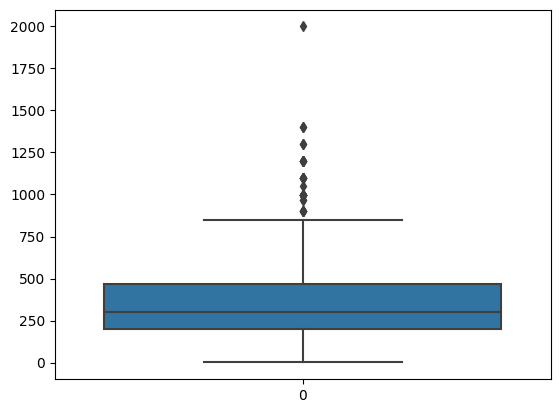

In [ ]:
sns.boxplot(df['Price ($)'])

In [ ]:
df_new=df[['Price ($)']]
df_new

,Price ($)
0,999
1,1199
2,899
3,279
4,799
...,...
402,1049
403,349
404,1099
405,429


In [ ]:
df_new = df_new[~((df_new < lb) & (df_new > ub)).any(axis=1)]

In [ ]:
df_new.shape

(407, 1)

<Axes: >

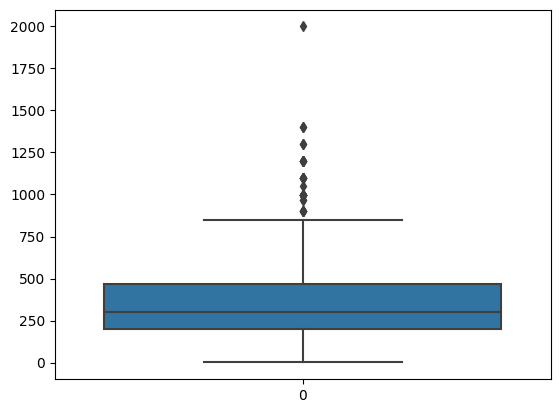

In [ ]:
sns.boxplot(df_new['Price ($)'])

<a id="variance"> </a>
### Variance
<ul>
  <li>Variance measure the dispersion of the data from the mean</li>
  <li>It is an average of the sum of squares of difference between an observation and the mean. Thus the variance is always positive</li>


In [ ]:
df['Price ($)'].var()

85920.56621198

<a id="std"> </a>
### Standard Deviation

<ol>
    <li> Standard deviation is the positive square root of the variance </li>
    <li> It has the same unit as that of the observations</li>

In [ ]:
df['Price ($)'].std()

293.1221012001313

<a id="cv"> </a>
### Coefficient of Variation
<ul>
    <li>The coefficient of variation is a statistical measure of dispersion of data points around the mean</li>
    <li>It is a unit free measure and is always expressed in percentage</li>

In [ ]:
(df['Price ($)'].std()/df['Price ($)'].mean())*100

73.42033059785429

In [ ]:
df.cov()

<ipython-input-51-6f98a29763d5>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
Storage,4220.212101,109.224338,-3881.613440,13042.602147,15.695186,580.174822,348.129604,177.135014,32.528292,5.385899
RAM,109.224338,5.914525,-53.562908,421.110172,0.646718,30.709160,13.222341,5.833311,1.304886,0.229575
Battery Capacity (mAh),-3881.613440,-53.562908,635517.816572,-96091.054768,243.334673,5704.681062,-940.136230,-179.190660,238.627480,155.804883
Price ($),13042.602147,421.110172,-96091.054768,85920.566212,11.546647,780.372551,1783.753313,731.031517,84.557582,3.713550
n_cameras,15.695186,0.646718,243.334673,11.546647,0.616865,9.291379,1.772431,1.332918,0.880309,0.113428
res1,580.174822,30.709160,5704.681062,780.372551,9.291379,608.714564,38.115358,21.697722,17.969245,3.022312
res2,348.129604,13.222341,-940.136230,1783.753313,1.772431,38.115358,103.523668,22.614027,3.935029,0.504686
res3,177.135014,5.833311,-179.190660,731.031517,1.332918,21.697722,22.614027,24.038489,2.248635,0.374393
res4,32.528292,1.304886,238.627480,84.557582,0.880309,17.969245,3.935029,2.248635,3.001731,0.118412
screen,5.385899,0.229575,155.804883,3.713550,0.113428,3.022312,0.504686,0.374393,0.118412,0.102798


In [ ]:
import scipy
from scipy.stats import variation

scipy.stats.variation(df['Price ($)'])

0.7333007815980785

#Descriptive Statistics

In [ ]:
df.describe(include='all')

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
count,407,407,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
unique,16,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Samsung,Poco X3 Pro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,79,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,123.046683,5.837838,4676.476658,399.238329,3.144963,43.316953,9.125307,3.641278,1.027027,6.471327
std,NaN,NaN,64.963160,2.431980,797.193713,293.122101,0.785408,24.672141,10.174658,4.902906,1.732550,0.320622
min,NaN,NaN,32.000000,2.000000,1821.000000,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000,4.500000
25%,NaN,NaN,64.000000,4.000000,4300.000000,199.000000,3.000000,13.000000,2.000000,2.000000,0.000000,6.440000
50%,NaN,NaN,128.000000,6.000000,5000.000000,299.000000,3.000000,48.000000,8.000000,2.000000,0.000000,6.500000
75%,NaN,NaN,128.000000,8.000000,5000.000000,469.000000,4.000000,64.000000,12.000000,5.000000,2.000000,6.590000


In [ ]:
df.describe(include=np.number)

,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,123.046683,5.837838,4676.476658,399.238329,3.144963,43.316953,9.125307,3.641278,1.027027,6.471327
std,64.963160,2.431980,797.193713,293.122101,0.785408,24.672141,10.174658,4.902906,1.732550,0.320622
min,32.000000,2.000000,1821.000000,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000,4.500000
25%,64.000000,4.000000,4300.000000,199.000000,3.000000,13.000000,2.000000,2.000000,0.000000,6.440000
50%,128.000000,6.000000,5000.000000,299.000000,3.000000,48.000000,8.000000,2.000000,0.000000,6.500000
75%,128.000000,8.000000,5000.000000,469.000000,4.000000,64.000000,12.000000,5.000000,2.000000,6.590000
max,512.000000,16.000000,7000.000000,1999.000000,4.000000,108.000000,64.000000,48.000000,12.000000,7.600000


In [ ]:
df.describe(include=np.object)

<ipython-input-55-f5c37ff7ec99>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=np.object)


,Brand,Model
count,407,407
unique,16,239
top,Samsung,Poco X3 Pro
freq,79,6


#Shape of the data

<a id="skewness"> </a>
### Skewness
<ul>
  <li>Skewness helps us to study the shape of the data.</li>
  <li>It represents how much a distribution differs from a normal distribution, either to the left or to the right.</li>
    <li>The value of the skewness can be either positive, negative or zero.</li>
</ul>  

In [ ]:
df.skew()

<ipython-input-56-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Storage                   2.077271
RAM                       0.959169
Battery Capacity (mAh)   -0.818868
Price ($)                 1.635034
n_cameras                -0.537236
res1                      0.395580
res2                      3.323150
res3                      4.370052
res4                      2.611113
screen                   -3.575040
dtype: float64

We find that Storage,RAM,Price,res2,res3,res4 are positively Skewed whereas screen size, no of cameras,Battery Capacity are neagtively skewed while res1 is symeteric

<a id="kurtosis"> </a>
### Kurtosis
<ul>
    <li> Kurtosis measures the peakedness of the distribution</li>
   <li>In other words, kurtosis is a statistical measure that defines how the tails of the distribution differ from the normal distribution</li>
       <li>Kurtosis identifies whether the tails of a given distribution contain extreme values</li>
</ul>  


In [ ]:
df.kurt()

<ipython-input-57-8bd0d54cd88d>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


Storage                    8.809359
RAM                        0.915080
Battery Capacity (mAh)     2.113240
Price ($)                  2.878530
n_cameras                 -0.419465
res1                       0.241375
res2                      12.249120
res3                      30.069143
res4                       9.996952
screen                    17.879367
dtype: float64

<ipython-input-58-576f466a8547>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price ($)'])


<Axes: xlabel='Price ($)', ylabel='Density'>

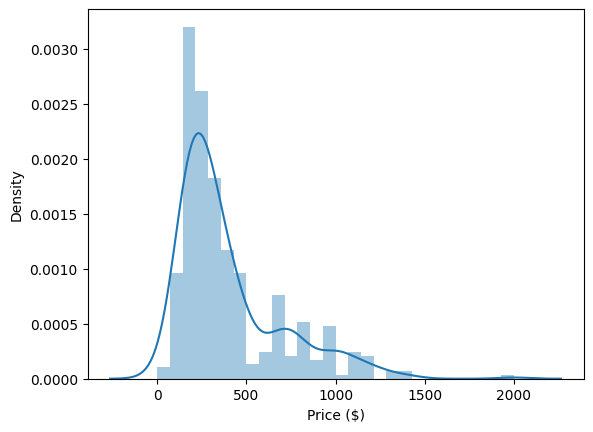

In [ ]:
sns.distplot(df['Price ($)'])

The variable
‘prices’ is leptokurtic

<a id="corr"></a>
### Correlation
  <li>It shows whether pairs of variables are related to each other</li>
  <li>If there is correlation, it shows how strong the correlation is</li>
  <li>Correlation takes values between -1 to +1, where values close to +1 represents strong positive correlation while values close to -1 represents strong negative correlation</li>
</ul>  


In [ ]:
df.corr()

<ipython-input-59-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
Storage,1.000000,0.691341,-0.074952,0.684934,0.307613,0.361980,0.526689,0.556139,0.289007,0.258582
RAM,0.691341,1.000000,-0.027627,0.590728,0.338579,0.511801,0.534353,0.489217,0.309690,0.294423
Battery Capacity (mAh),-0.074952,-0.027627,1.000000,-0.411216,0.388638,0.290042,-0.115906,-0.045846,0.172771,0.609571
Price ($),0.684934,0.590728,-0.411216,1.000000,0.050155,0.107906,0.598090,0.508667,0.166501,0.039514
n_cameras,0.307613,0.338579,0.388638,0.050155,1.000000,0.479489,0.221796,0.346142,0.646925,0.450435
res1,0.361980,0.511801,0.290042,0.107906,0.479489,1.000000,0.151836,0.179372,0.420375,0.382067
res2,0.526689,0.534353,-0.115906,0.598090,0.221796,0.151836,1.000000,0.453320,0.223225,0.154706
res3,0.556139,0.489217,-0.045846,0.508667,0.346142,0.179372,0.453320,1.000000,0.264716,0.238167
res4,0.289007,0.309690,0.172771,0.166501,0.646925,0.420375,0.223225,0.264716,1.000000,0.213166
screen,0.258582,0.294423,0.609571,0.039514,0.450435,0.382067,0.154706,0.238167,0.213166,1.000000


<ipython-input-60-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


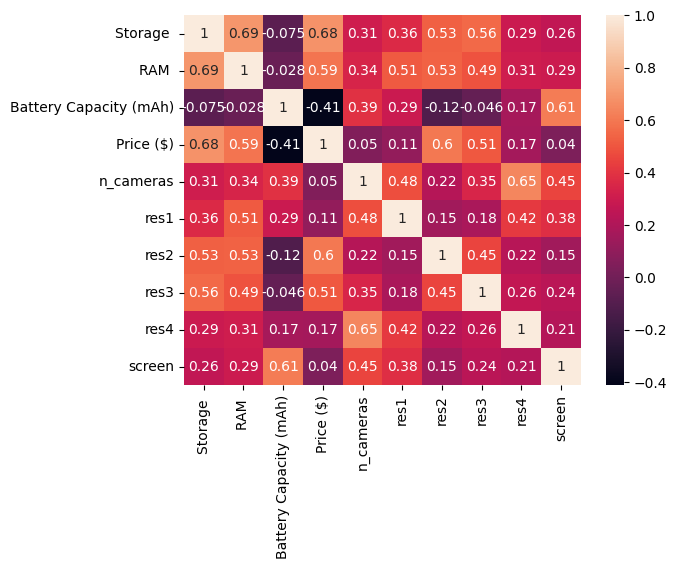

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

We find screen size and Battery Capacity are strongly corelated

<a id="cov"> </a>
## Covariance

<ul>
  <li>It is the relationship between a pair of random variables where change in one variable causes change in another variable</li>
  <li>It can take any value between -infinity to +infinity, where the negative value represents the negative relationship whereas a positive value represents the positive relationship</li>
</ul>  

</body>
</html>

In [ ]:
df.cov()

<ipython-input-61-6f98a29763d5>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
Storage,4220.212101,109.224338,-3881.613440,13042.602147,15.695186,580.174822,348.129604,177.135014,32.528292,5.385899
RAM,109.224338,5.914525,-53.562908,421.110172,0.646718,30.709160,13.222341,5.833311,1.304886,0.229575
Battery Capacity (mAh),-3881.613440,-53.562908,635517.816572,-96091.054768,243.334673,5704.681062,-940.136230,-179.190660,238.627480,155.804883
Price ($),13042.602147,421.110172,-96091.054768,85920.566212,11.546647,780.372551,1783.753313,731.031517,84.557582,3.713550
n_cameras,15.695186,0.646718,243.334673,11.546647,0.616865,9.291379,1.772431,1.332918,0.880309,0.113428
res1,580.174822,30.709160,5704.681062,780.372551,9.291379,608.714564,38.115358,21.697722,17.969245,3.022312
res2,348.129604,13.222341,-940.136230,1783.753313,1.772431,38.115358,103.523668,22.614027,3.935029,0.504686
res3,177.135014,5.833311,-179.190660,731.031517,1.332918,21.697722,22.614027,24.038489,2.248635,0.374393
res4,32.528292,1.304886,238.627480,84.557582,0.880309,17.969245,3.935029,2.248635,3.001731,0.118412
screen,5.385899,0.229575,155.804883,3.713550,0.113428,3.022312,0.504686,0.374393,0.118412,0.102798


<ipython-input-62-3653ad630287>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.cov(),annot=True)


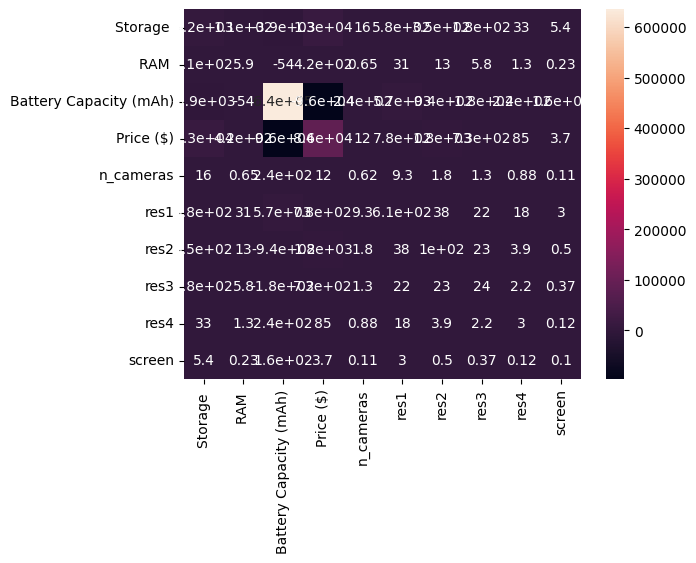

In [ ]:
sns.heatmap(df.cov(),annot=True)
plt.show()

We find storage &  Price and RAM & Price are strongly correlated